# Adventure Work Cycles Profit Decline #

Author: Kseniia P.

### Plan ###

<br/>
<font size= "4">
    
1. Explore the dataset

2. Explore the problem: the decine of profits

3. Identify the sources of the problem

4. Dive deep into the problem.
</font>




## Part 1. Explore the dataset ##

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#let's just take a look at how the data we are going to work with
#replace the file_path value if needed
file_path = 'adventure_works_purchase_orders.csv'

df = pd.read_csv(file_path)

#let's take a look at the column set and number of rows

print(df.columns)
print(df.shape[0])

df.head()

Index(['SalesOrderNumber', 'OrderDate', 'DueDate', 'ShipDate', 'Sales_Person',
       'Sales_Region', 'Sales_Province', 'Sales_City', 'Sales_Postal_Code',
       'Customer_Code', 'Customer_Name', 'Customer_Region',
       'Customer_Province', 'Customer_City', 'Customer_Postal_Code',
       'LineItem_Id', 'Product_Category', 'Product_Sub_Category',
       'Product_Name', 'Product_Code', 'Unit_Cost', 'UnitPrice',
       'UnitPriceDiscount', 'OrderQty', 'Unit_Freight_Cost'],
      dtype='object')
41884


,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


In [3]:
#Adding some potentially useful date fields

df['OrderDate_dt'] = pd.to_datetime(df['OrderDate'], format='%m/%d/%y')
df['Month'] = df.OrderDate_dt.dt.month
df['Year'] = df.OrderDate_dt.dt.year
df['ReportingMonth'] = df.OrderDate_dt.dt.strftime('%Y_%m')
df['Quarter'] = df.Month.apply(lambda x: (x + 2) // 3)
df['ReportingQuarter'] = df.apply(lambda x: str(x.Year) + '_Q' + str(x.Quarter), axis = 1)

df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,OrderDate_dt,Month,Year,ReportingMonth,Quarter,ReportingQuarter
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3374.99,0.0,1,51.3415,2005-07-01,7,2005,2005_07,3,2005_Q3
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3374.99,0.0,3,51.3415,2005-07-01,7,2005,2005_07,3,2005_Q3
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3374.99,0.0,1,51.3415,2005-07-01,7,2005,2005_07,3,2005_Q3
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3399.99,0.0,1,51.3415,2005-07-01,7,2005,2005_07,3,2005_Q3
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3399.99,0.0,1,51.3415,2005-07-01,7,2005,2005_07,3,2005_Q3


Start period : 2005_07
End period : 2008_06


ReportingQuarter
2005_Q3    44.333333
2005_Q4    51.000000
2006_Q1    48.666667
2006_Q2    49.666667
2006_Q3    79.000000
2006_Q4    77.333333
2007_Q1    74.666667
2007_Q2    77.000000
2007_Q3    93.333333
2007_Q4    95.000000
2008_Q1    94.000000
2008_Q2    92.333333
Name: OrderQuantity, dtype: float64


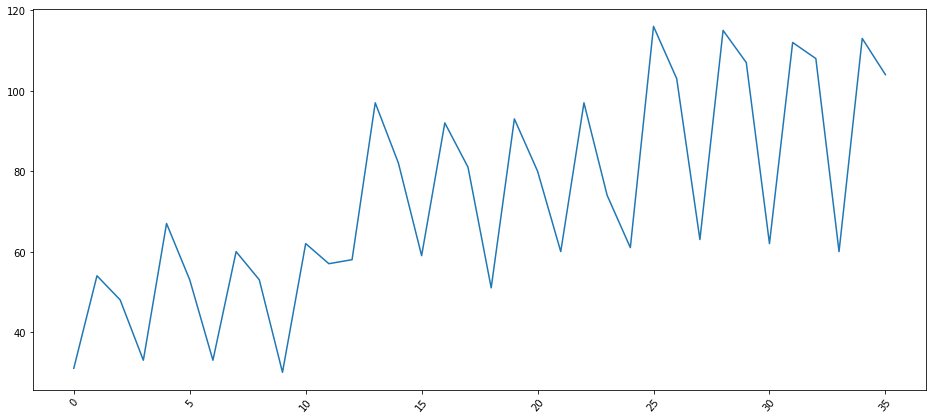

In [4]:
#now we can take a quick look at how the compeny order quanity changes over time
orders = df.groupby(['ReportingMonth', 'ReportingQuarter']).agg({'SalesOrderNumber': pd.Series.nunique}).sort_index()

orders.columns = ['OrderQuantity']
orders.reset_index(inplace = True)

#fluctuations are strong, we can see some growth at the beginning but during last year it looks pretty stable
plt.figure(figsize=(16, 7))
plt.xticks(rotation=50)
plt.plot(orders.index, orders.OrderQuantity.values)


print("Start period : " + str(orders.ReportingMonth.min()))
print("End period : " + str(orders.ReportingMonth.max()))

orders_avg_quarterly = orders.groupby(['ReportingQuarter']).OrderQuantity.mean()
print('\n')
print(orders_avg_quarterly)

So we have information about the orders made between July 2005 and June 2008. During last year the average monthly order quantity was a bit more than 92 orders per month.

In [5]:
#Exploring values in the top-level dimensions: customer region and product category
#let's explore customer region first

orders_regions = df.groupby(['ReportingMonth', 'Customer_Region']).agg({'SalesOrderNumber': pd.Series.nunique}).sort_index()

orders_regions.columns = ['OrderQuantity']
orders_regions.reset_index(inplace = True)

orders_regions = orders_regions.pivot(index = 'ReportingMonth', columns = 'Customer_Region')

orders_regions

OrderQuantity                      
Customer_Region        France Germany United States
ReportingMonth                                     
2005_07                   NaN     NaN          31.0
2005_08                   NaN     NaN          54.0
2005_09                   NaN     NaN          48.0
2005_10                   NaN     NaN          33.0
2005_11                   NaN     NaN          67.0
2005_12                   NaN     NaN          53.0
2006_01                   NaN     NaN          33.0
2006_02                   NaN     NaN          60.0
2006_03                   NaN     NaN          53.0
2006_04                   NaN     NaN          30.0
2006_05                   NaN     NaN          62.0
2006_06                   NaN     NaN          57.0
2006_07                   4.0     NaN          54.0
2006_08                   4.0     NaN          93.0
2006_09                   5.0     NaN          77.0
2006_10                   4.0     NaN          55.0
2006_11                   6.0     NaN          86.0
2006_12                   5.0     NaN          76.0
2007_01                   3.0     NaN          48.0
2007_02                   4.0     NaN          89.0
2007_03                   5.0     NaN          75.0
2007_04                   4.0     NaN          56.0
2007_05                   5.0     NaN          92.0
2007_06                   4.0     NaN          70.0
2007_07                   2.0     NaN          59.0
2007_08                  15.0     NaN         101.0
2007_09                   9.0     NaN          94.0
2007_10                   3.0     NaN          60.0
2007_11                  15.0     NaN         100.0
2007_12                   8.0     NaN          99.0
2008_01                   3.0     NaN          59.0
2008_02                  13.0     NaN          99.0
2008_03                   7.0     1.0         100.0
2008_04                   3.0     NaN          57.0
2008_05                  14.0     NaN          99.0
2008_06                   9.0     NaN          95.0

We can see that there are three regions: the USA, France (from July 2006), Germany. Howevever, for Germany we have only one order. I think it would be rational to exclude Germany from my analysis as it can create some noise in the data. 

In [6]:
#filtering out Germany 
df = df[df.Customer_Region != 'Germany']

In [7]:
#let's look at the another main dimenstion, product category. For this category let's look at the quantity sold, not orders
qty_products = df.groupby(['ReportingMonth', 'Product_Category']).agg({'OrderQty': 'sum'}).sort_index()

qty_products.columns = ['QuantitySold']
qty_products.reset_index(inplace = True)

qty_products = qty_products.pivot(index = 'ReportingMonth', columns = 'Product_Category')
qty_products.columns = qty_products.columns.droplevel(0)
qty_products.reset_index(inplace = True)
qty_products['ReportingQuarter'] = qty_products.ReportingMonth.apply(lambda x: x[:5] + 'Q' + str((int(x[5:]) + 2) //3))

qty_products.tail(10)

Product_Category,ReportingMonth,Accessories,Bikes,Clothing,Components,ReportingQuarter
26,2007_09,1165,2249,2388,2664,2007_Q3
27,2007_10,743,1469,1676,843,2007_Q4
28,2007_11,924,2242,2111,1848,2007_Q4
29,2007_12,767,1879,1711,1559,2007_Q4
30,2008_01,427,1220,998,365,2008_Q1
31,2008_02,421,1920,1181,910,2008_Q1
32,2008_03,364,1640,1023,723,2008_Q1
33,2008_04,733,1418,1514,845,2008_Q2
34,2008_05,889,2187,1943,1796,2008_Q2
35,2008_06,804,1858,1563,1525,2008_Q2


In [8]:
#let's look at quarterly data

product_list = ['Accessories', 'Bikes', 'Clothing', 'Components']

qty_products_quarterly = qty_products.groupby(['ReportingQuarter']).agg({
    'Accessories': 'mean', 
    'Bikes': 'mean', 
    'Clothing': 'mean',
    'Components':'mean'})

qty_products_quarterly['Sum'] = qty_products_quarterly.apply(lambda x: x.Accessories + x.Bikes + x.Clothing + x.Components, axis = 1).round(2)


for product in product_list:
    new_col_name = 'Share' + product
    qty_products_quarterly[product] = qty_products_quarterly[product].round(2)
    qty_products_quarterly[new_col_name] = (qty_products_quarterly[product] / qty_products_quarterly['Sum']).round(2)

qty_products_quarterly

,Accessories,Bikes,Clothing,Components,Sum,ShareAccessories,ShareBikes,ShareClothing,ShareComponents
ReportingQuarter,,,,,,,,,
2005_Q3,107.00,620.33,248.33,156.33,1132.00,0.09,0.55,0.22,0.14
2005_Q4,142.33,980.67,306.33,249.00,1678.33,0.08,0.58,0.18,0.15
2006_Q1,61.00,851.00,194.67,97.00,1203.67,0.05,0.71,0.16,0.08
2006_Q2,151.00,963.67,314.00,243.67,1672.33,0.09,0.58,0.19,0.15
2006_Q3,593.00,2045.33,2020.00,1896.67,6555.00,0.09,0.31,0.31,0.29
2006_Q4,409.67,1748.33,1460.33,1159.33,4777.67,0.09,0.37,0.31,0.24
2007_Q1,198.00,1484.67,843.33,493.33,3019.33,0.07,0.49,0.28,0.16
2007_Q2,425.00,1687.33,1462.67,1137.00,4712.00,0.09,0.36,0.31,0.24
2007_Q3,1153.00,2189.00,2494.00,2408.67,8244.67,0.14,0.27,0.30,0.29


#### Part 1 Conclusions. Explore the dataset. ####

<br/>
1. We have data for 3 years: from July 2005 to June 2008.
<br/>
2. The regions of business are the USA and France. There was one order from Germany, I filtered it out.
<br/>
3. There are 4 main product categories: Accessories, Bikes, Clothing, Components. The most popoular category is bikes.
<br/>
4. Monthly orders are very volatile and we observe some seasonality: a drop in the first month of each quarter. Overall the averaged by quarter number of monthly orders is quite stable over the last year with a slight decrease in the last quater.
<br/>
<br/>
P.S. This exploration is important to start working with data efficiently but I won't use any of this data above in the presenation. The data for the presenation will be derived in the next parts.


<br/>

## Part 2. Explore the Problem: the Decline of Profits ##


There can be 2 main issues behind a profit decline:
<br/>
<br/>
1) the decline of revenue
<br/>
2) the growth of costs
<br/>
<br/>
Let's check which one is true in this case
<br/>
<br/>
Note: We have some freight cost information available. It is not clear whether this freight cost is covered by us or by customer. I will assume that freight costs are paid by a customer and I won't add them to my profit calculations. 

In [9]:
#Let's add some profit related columns
df['Revenue'] = df.UnitPrice * (1 - df.UnitPriceDiscount) * df.OrderQty

#Cogs is for costs of goods sold
df['Cogs'] = df.Unit_Cost * df.OrderQty
df['Profit'] = df['Revenue'] - df['Cogs']


In [11]:
#let's take a look how the profit historical data looks like
#I will calculate data in thousands
profit_data = df.groupby(['ReportingMonth']).agg({
                'Revenue': lambda x: sum(x)/1000,
                'Cogs': lambda x: sum(x)/1000,
                'Profit': lambda x: sum(x)/1000}).sort_index().round(1)

profit_data['Profit_Margin'] = (profit_data.Profit / profit_data.Revenue).round(2)
profit_data.reset_index(inplace = True)

profit_data.tail(12)

,ReportingMonth,Revenue,Cogs,Profit,Profit_Margin
24,2007_07,3059.5,1878.1,1181.3,0.39
25,2007_08,5081.8,3054.9,2026.9,0.40
26,2007_09,4311.2,2628.4,1682.9,0.39
27,2007_10,2534.1,1513.0,1021.1,0.40
28,2007_11,4080.1,2406.5,1673.6,0.41
29,2007_12,3347.7,1990.6,1357.1,0.41
30,2008_01,1935.0,1155.6,779.5,0.40
31,2008_02,3268.9,1940.6,1328.3,0.41
32,2008_03,2717.9,1627.7,1090.2,0.40
33,2008_04,2456.3,1830.0,626.3,0.25


We can easily notice that the profit margin has been lower for the last 3 months. It actully means that there is an increase of costs or a drop of revenue or both. 
<br>
Let's draw some graphs to make the reason more visible. As we have seen, the order data has much noise, I will use a rolling mean for 3 months to make data more smooth and more interpretable

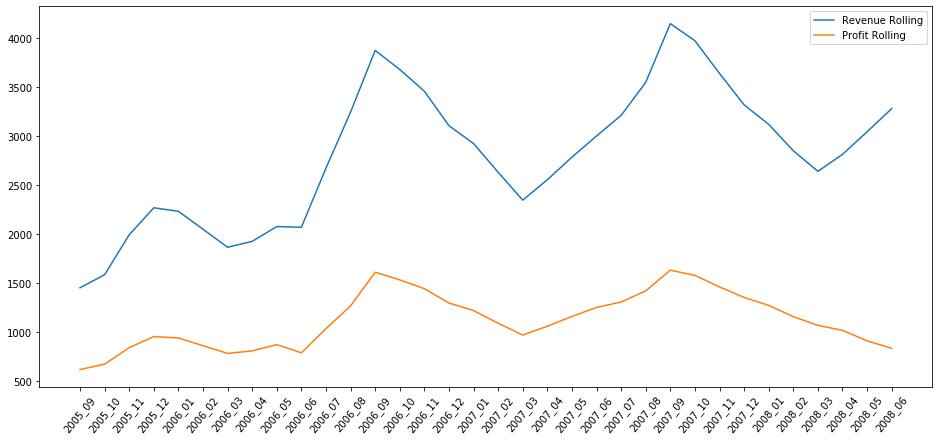

In [12]:
for column in ['Revenue', 'Profit']:
    profit_data[column + 'Rolling'] = profit_data[column].rolling(3).mean().round()
    
plt.figure(figsize=(16, 7))
plt.xticks(rotation=50)
plt.plot(profit_data.ReportingMonth.values[2:], profit_data.RevenueRolling.values[2:], label = 'Revenue Rolling')
plt.plot(profit_data.ReportingMonth.values[2:], profit_data.ProfitRolling.values[2:], label = 'Profit Rolling')
plt.legend()
plt.show()


#### Part 2 Conclusions. Explore the problem. ####

<br/>
<br/>
1. A profit margin fell significantly for the last 3 months of data. It was around 40% before April 2008 but sinse April 2008 it is about 25%.
<br/>
2. Although there are some seasonal effects in revenue, I don't observe any considerable decline in revenue during the recent months. 
<br/>
3. I do observe a significant fall in profits in the last months. Taking into account that revenue is not the source of the problem, we can conclude that it is a cost increase that led to an observed profit decline. 
<br/>

<br/>



## Part 3. Idenitify the sources of the problem ##

In this part I will try to explore the main potential sources of this problem, particularly, take a closer look at the main dimensions: regions and product categories.


In [13]:
#Let's explore profit changes within main categories.
#I will just copy a code that I used for the full dataset before
#To make it more convenient, I will write a function that allows to apply this code to a specific value within a dimenstion

def profit_for_dim_value(df_func, dim_column, dim_value):
    if dim_column is not None and dim_value is not None :
        df_used = df_func[df_func[dim_column] == dim_value]
    else:
        df_used = df_func
    profit_data_dim_value = df_used.groupby(['ReportingMonth']).agg({
                'Revenue': lambda x: sum(x)/1000,
                'Cogs': lambda x: sum(x)/1000,
                'Profit': lambda x: sum(x)/1000
                ,'Unit_Cost': 'mean'}).sort_index().round(1)

    profit_data_dim_value['Profit_Margin'] = (profit_data_dim_value.Profit / profit_data_dim_value.Revenue).round(2)
    profit_data_dim_value.reset_index(inplace = True)

    for column in ['Revenue', 'Profit']:
        profit_data_dim_value[column + 'Rolling'] = profit_data_dim_value[column].rolling(3).mean().round()
    
    plt.figure(figsize=(16, 7))
    plt.xticks(rotation=50)
    plt.plot(profit_data_dim_value.ReportingMonth.values[2:], profit_data_dim_value.RevenueRolling.values[2:], label = 'Revenue Rolling')
    plt.plot(profit_data_dim_value.ReportingMonth.values[2:], profit_data_dim_value.ProfitRolling.values[2:], label = 'Profit Rolling')
    plt.legend()
    plt.title(dim_value)
    plt.show()

    return profit_data_dim_value
    


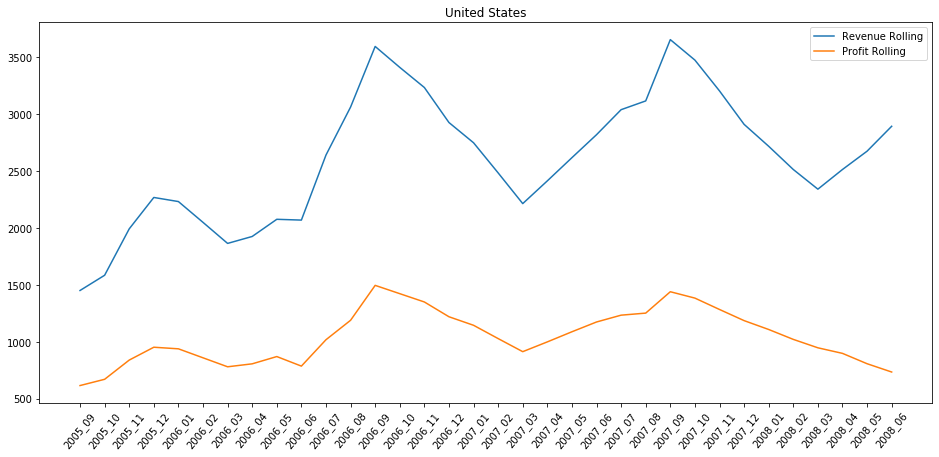

,ReportingMonth,Revenue,Cogs,Profit,Unit_Cost,Profit_Margin,RevenueRolling,ProfitRolling
24,2007_07,3006.1,1849.4,1156.8,363.4,0.38,3040.0,1233.0
25,2007_08,3990.6,2382.0,1608.6,358.8,0.40,3117.0,1251.0
26,2007_09,3972.5,2421.5,1550.9,373.6,0.39,3656.0,1439.0
27,2007_10,2463.6,1475.0,988.6,385.2,0.40,3476.0,1383.0
28,2007_11,3178.7,1870.0,1308.7,387.7,0.41,3205.0,1283.0
29,2007_12,3089.6,1833.0,1256.6,415.0,0.41,2911.0,1185.0
30,2008_01,1885.0,1128.5,756.5,441.4,0.40,2718.0,1107.0
31,2008_02,2567.9,1520.5,1047.4,477.4,0.41,2514.0,1020.0
32,2008_03,2569.9,1537.3,1032.6,499.7,0.40,2341.0,946.0
33,2008_04,2404.9,1795.0,610.0,475.5,0.25,2514.0,897.0


In [14]:
#Let's take a look at the regions and start with the United States
profit_data_us = profit_for_dim_value(df, 'Customer_Region', 'United States')
profit_data_us.tail(12)

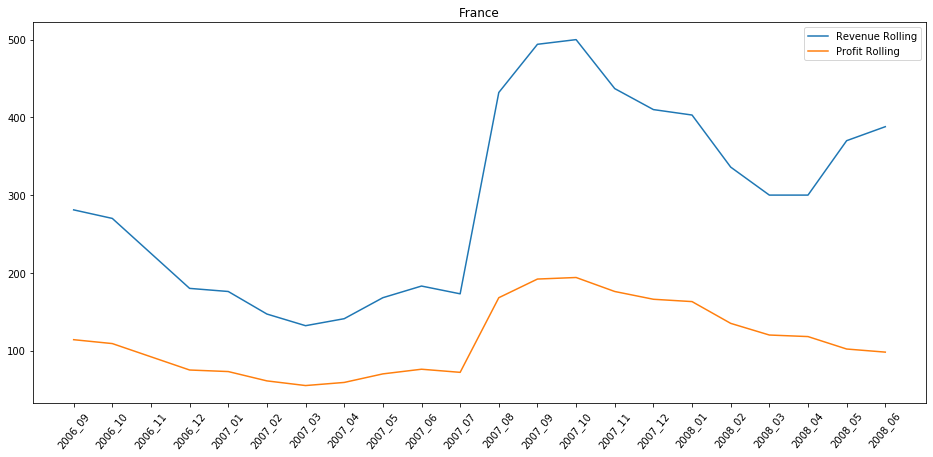

,ReportingMonth,Revenue,Cogs,Profit,Unit_Cost,Profit_Margin,RevenueRolling,ProfitRolling
12,2007_07,53.3,28.8,24.6,215.2,0.46,173.0,72.0
13,2007_08,1091.1,672.8,418.3,374.7,0.38,432.0,168.0
14,2007_09,338.8,206.8,131.9,337.0,0.39,494.0,192.0
15,2007_10,70.5,38.0,32.5,254.7,0.46,500.0,194.0
16,2007_11,901.4,536.5,365.0,401.0,0.40,437.0,176.0
17,2007_12,258.1,157.5,100.5,379.2,0.39,410.0,166.0
18,2008_01,50.0,27.1,22.9,318.5,0.46,403.0,163.0
19,2008_02,701.0,420.1,280.9,486.5,0.40,336.0,135.0
20,2008_03,148.0,90.4,57.6,413.8,0.39,300.0,120.0
21,2008_04,51.4,35.1,16.3,302.1,0.32,300.0,118.0


In [15]:
#Let's go to France
profit_data_fr = profit_for_dim_value(df, 'Customer_Region', 'France')
profit_data_fr.tail(12)

So both for France and the US we observe a decline in profits because of higher COGS. A decline for France is more gradual. As France accounts only for 5% of revenue, this slight difference doesn't influence the total effect much. So overall I observe a very similar decline in both countries.

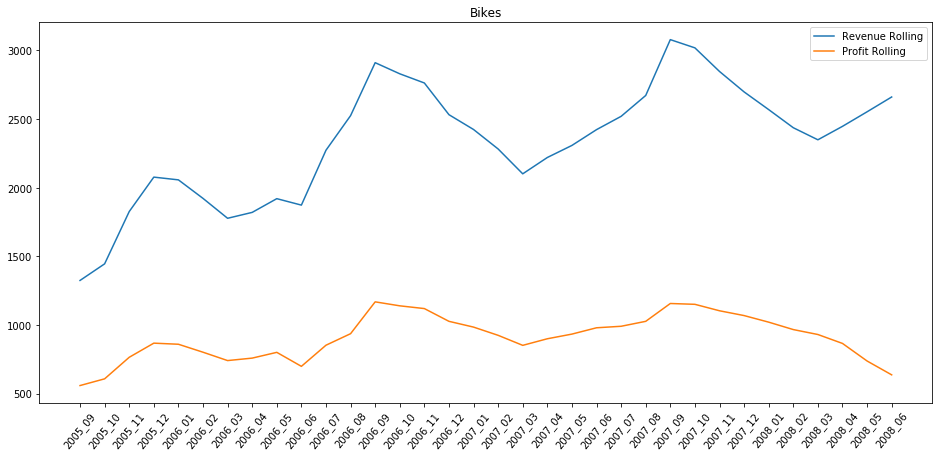

,ReportingMonth,Revenue,Cogs,Profit,Unit_Cost,Profit_Margin,RevenueRolling,ProfitRolling
24,2007_07,2314.9,1456.7,858.2,812.7,0.37,2520.0,990.0
25,2007_08,3778.8,2333.8,1445.1,834.5,0.38,2672.0,1026.0
26,2007_09,3143.3,1977.2,1166.1,839.3,0.37,3079.0,1156.0
27,2007_10,2135.2,1296.3,838.9,802.0,0.39,3019.0,1150.0
28,2007_11,3261.6,1959.0,1302.6,832.4,0.40,2847.0,1103.0
29,2007_12,2696.6,1633.5,1063.1,844.3,0.39,2698.0,1068.0
30,2008_01,1750.0,1056.3,693.7,821.8,0.40,2569.0,1020.0
31,2008_02,2863.4,1723.1,1140.3,881.4,0.40,2437.0,966.0
32,2008_03,2432.6,1475.3,957.3,872.9,0.39,2349.0,930.0
33,2008_04,2045.8,1548.4,497.4,1013.9,0.24,2447.0,865.0


In [17]:
#let's take a look at the 4 main product categories
#let's look at the bikes first

profit_data_bikes = profit_for_dim_value(df, 'Product_Category', 'Bikes')
profit_data_bikes.tail(12)

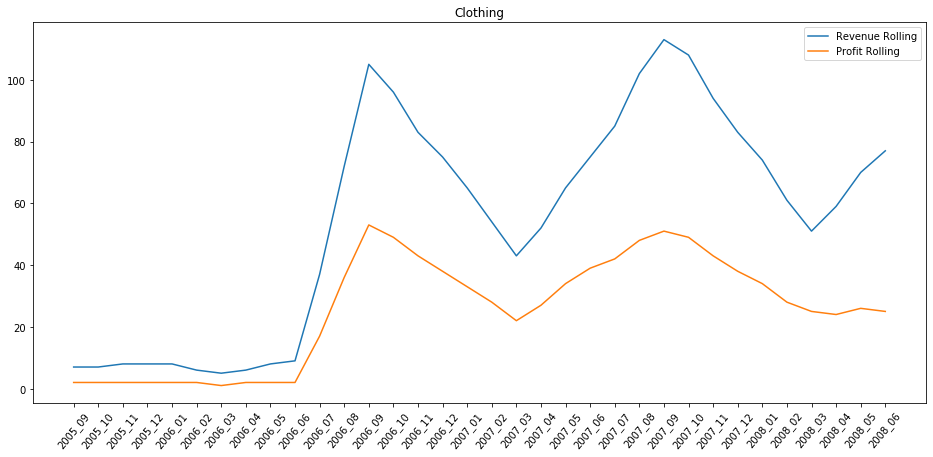

,ReportingMonth,Revenue,Cogs,Profit,Unit_Cost,Profit_Margin,RevenueRolling,ProfitRolling
24,2007_07,91.9,52.2,39.7,24.5,0.43,85.0,42.0
25,2007_08,138.7,74.9,63.8,24.7,0.46,102.0,48.0
26,2007_09,109.3,60.5,48.8,24.7,0.45,113.0,51.0
27,2007_10,76.7,41.0,35.7,24.3,0.47,108.0,49.0
28,2007_11,94.5,49.9,44.6,23.8,0.47,94.0,43.0
29,2007_12,77.1,42.2,35.0,24.4,0.45,83.0,38.0
30,2008_01,49.0,25.8,23.2,25.4,0.47,74.0,34.0
31,2008_02,56.0,28.8,27.2,23.7,0.49,61.0,28.0
32,2008_03,49.0,25.4,23.6,23.9,0.48,51.0,25.0
33,2008_04,70.6,48.8,21.8,31.7,0.31,59.0,24.0


In [19]:
#let's go to clothing

#Let's go to France
profit_data_cloth = profit_for_dim_value(df, 'Product_Category', 'Clothing')
profit_data_cloth.tail(12)

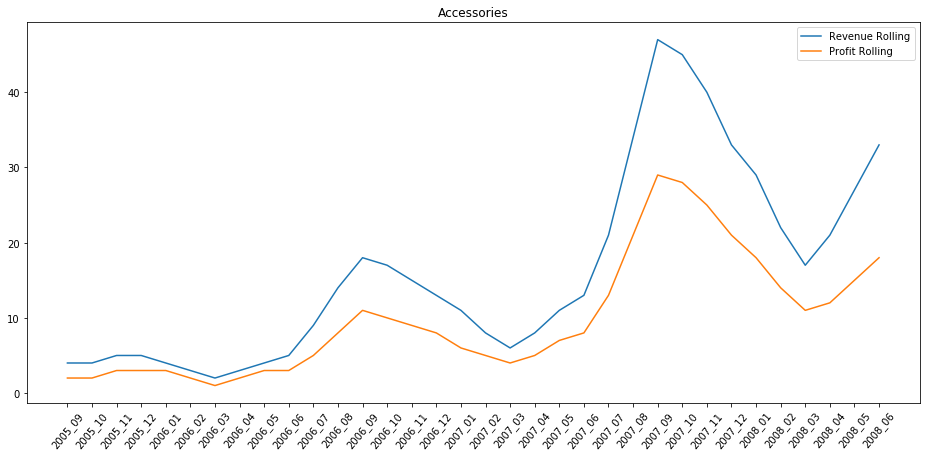

,ReportingMonth,Revenue,Cogs,Profit,Unit_Cost,Profit_Margin,RevenueRolling,ProfitRolling
24,2007_07,36.4,14.6,21.8,14.1,0.60,21.0,13.0
25,2007_08,51.8,19.6,32.2,14.8,0.62,34.0,21.0
26,2007_09,52.0,19.8,32.1,14.5,0.62,47.0,29.0
27,2007_10,30.7,11.6,19.1,15.0,0.62,45.0,28.0
28,2007_11,38.8,14.7,24.1,15.7,0.62,40.0,25.0
29,2007_12,30.8,11.6,19.2,14.9,0.62,33.0,21.0
30,2008_01,17.4,6.5,10.9,15.1,0.63,29.0,18.0
31,2008_02,18.1,6.8,11.3,15.2,0.62,22.0,14.0
32,2008_03,15.4,5.8,9.7,15.7,0.63,17.0,11.0
33,2008_04,29.6,14.0,15.6,18.5,0.53,21.0,12.0


In [21]:
#let's got to accessories

profit_data_access = profit_for_dim_value(df, 'Product_Category', 'Accessories')
profit_data_access.tail(12)

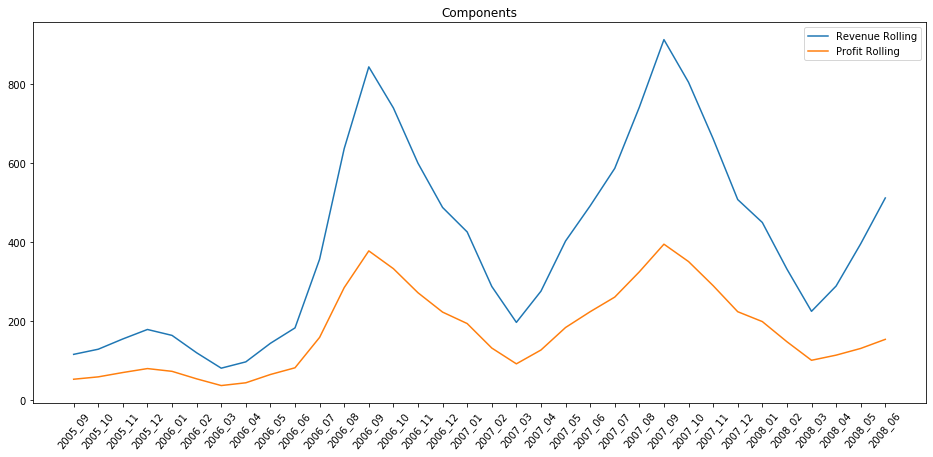

,ReportingMonth,Revenue,Cogs,Profit,Unit_Cost,Profit_Margin,RevenueRolling,ProfitRolling
24,2007_07,616.3,354.7,261.5,226.5,0.42,586.0,260.0
25,2007_08,1112.3,626.6,485.8,226.1,0.44,741.0,324.0
26,2007_09,1006.7,570.8,435.9,219.1,0.43,912.0,394.0
27,2007_10,291.6,164.2,127.5,190.9,0.44,804.0,350.0
28,2007_11,685.2,382.9,302.4,202.2,0.44,661.0,289.0
29,2007_12,543.1,303.3,239.8,200.2,0.44,507.0,223.0
30,2008_01,118.7,67.0,51.8,187.2,0.44,449.0,198.0
31,2008_02,331.3,182.0,149.4,194.5,0.45,331.0,147.0
32,2008_03,220.9,121.2,99.6,180.9,0.45,224.0,100.0
33,2008_04,310.3,218.8,91.5,256.4,0.29,288.0,113.0


In [22]:
#let's go to components
profit_data_comp = profit_for_dim_value(df, 'Product_Category', 'Components')
profit_data_comp.tail(12)

So we observe a 15% drop of the profit margin for 3 main product categories: Bikes, Components and Clothing. For the Accessories the effect is 10% but it is the smallest category so its share is very small. 

It is easy to notice this cost increace if we look at the column "Unit Cost": it grew significantly from March 2008 to April 2008.

#### Part 3 Conclustions. Identify the sources of the problem. ####

<br/>
<br/>
1. There is a profit decline due to higher COGS for all regions.
<br/>
2. There is a profit decline due to higher COGS for all product categories. 
<br/>
3. It means that there is no specific region or product category that is the major source of this profit decline. 
<br/>

My main conclusion is that a profit decline is the result of an overall COGS increase that happened between March and April 2008. This cost increase affected all product categories regardless a customer region. We can easily notice this if we compare a unit cost for each product category in March with a unit cost in April
<br/>

## Part 4. Dive deep ##

As I discovered earlier, the main reason of a profit decline was a cost increase. 

<br/>
Let's explore how this cost increase varies on the level of one specific product.
<br/>



In [23]:
#let's calculate a gross cost increase on the product code level
# I will take the average price for the first quarter of 2008 and compare it to the average price for the second quarter of 2008

old_prices = df[df.ReportingQuarter == '2008_Q1'].groupby(['Product_Code', 'Product_Name', 'Product_Category']).agg({'Unit_Cost':'mean'}).round(2)
old_prices.columns = ['Old_Unit_Cost']
old_prices.reset_index(inplace = True)

new_prices = df[df.ReportingQuarter == '2008_Q2'].groupby(['Product_Code']).agg({'Unit_Cost':'mean'}).round(2)
new_prices.columns = ['New_Unit_Cost']
new_prices.reset_index(inplace = True)

total_prices = old_prices.merge(new_prices, how='left', on = 'Product_Code')
total_prices['Coef'] = total_prices.New_Unit_Cost / total_prices.Old_Unit_Cost
total_prices.head(10)

,Product_Code,Product_Name,Product_Category,Old_Unit_Cost,New_Unit_Cost,Coef
0,BB-9108,HL Bottom Bracket,Components,53.94,67.43,1.250093
1,BK-M18B-40,"Mountain-500 Black, 40",Bikes,294.58,368.22,1.249983
2,BK-M18B-42,"Mountain-500 Black, 42",Bikes,294.58,368.22,1.249983
3,BK-M18B-44,"Mountain-500 Black, 44",Bikes,294.58,368.22,1.249983
4,BK-M18B-48,"Mountain-500 Black, 48",Bikes,294.58,368.22,1.249983
5,BK-M18B-52,"Mountain-500 Black, 52",Bikes,294.58,368.22,1.249983
6,BK-M18S-40,"Mountain-500 Silver, 40",Bikes,308.22,385.27,1.249984
7,BK-M18S-42,"Mountain-500 Silver, 42",Bikes,308.22,385.27,1.249984
8,BK-M18S-44,"Mountain-500 Silver, 44",Bikes,308.22,385.27,1.249984
9,BK-M18S-48,"Mountain-500 Silver, 48",Bikes,308.22,385.27,1.249984


In [24]:
#coefficients seem pretty similar. Let's look at the specific values

total_prices.Coef.unique()

array([1.2500927 , 1.24998303, 1.24998378, 1.24998809, 1.25000399,
       1.24999605, 1.24999273, 1.25      , 1.25000231, 1.24999518,
       1.25002167, 1.25000331, 1.24999663, 1.24916574, 1.25252525,
       1.24997219, 1.24994713, 1.25012309, 1.25003656, 1.25001729,
       1.24997492, 1.24996335, 1.25001385, 1.24998749, 1.25000831,
       1.24974722, 1.25027283, 1.24980901, 1.24987846, 1.25019486,
       1.24972191, 1.24990932, 1.24418605, 1.24971231, 1.25032092,
       1.25018042, 1.25010526, 1.2459893 ])

So actually now we can clearly see that a price of each product grew by 25% between March 2008 and April 2008.  Let's just check that with the same adjustment of 25% to revenues we would actually have the old profit margin as we used to have before.

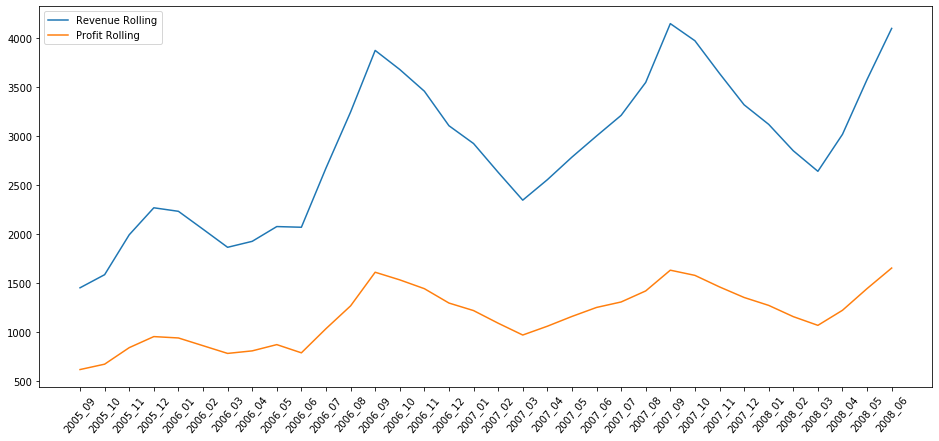

,ReportingMonth,Revenue,Cogs,Profit,Unit_Cost,Profit_Margin,RevenueRolling,ProfitRolling
26,2007_09,4311.2,2628.4,1682.9,370.8,0.39,4151.0,1630.0
27,2007_10,2534.1,1513.0,1021.1,378.9,0.40,3976.0,1577.0
28,2007_11,4080.1,2406.5,1673.6,390.2,0.41,3642.0,1459.0
29,2007_12,3347.7,1990.6,1357.1,412.7,0.41,3321.0,1351.0
30,2008_01,1935.0,1155.6,779.5,436.2,0.40,3121.0,1270.0
31,2008_02,3268.9,1940.6,1328.3,479.1,0.41,2851.0,1155.0
32,2008_03,2717.9,1627.7,1090.2,494.7,0.40,2641.0,1066.0
33,2008_04,3070.4,1830.0,1240.4,467.6,0.40,3019.0,1220.0
34,2008_05,4951.8,2955.4,1996.4,501.2,0.40,3580.0,1442.0
35,2008_06,4284.1,2565.2,1719.0,525.4,0.40,4102.0,1652.0


In [27]:
#Let's just check that 25% is a correct number
#let's apply a 25% increase to prices (to revenues) and look at the aggregated data
#if the number is correct, then our adjusted profit margin will be back to 40%

df_adjusted = df.loc[:, ['Cogs', 'Unit_Cost', 'ReportingMonth']].copy()
df_adjusted['Revenue'] = df.apply(lambda x: x.Revenue*1.25 if x.ReportingQuarter == '2008_Q2' else x.Revenue, axis = 1)
df_adjusted['Profit'] = df_adjusted['Revenue'] - df_adjusted['Cogs']
new_profit_data = profit_for_dim_value(df_adjusted, None, None)
new_profit_data.tail(10)

A 25% is indeed a correct value of a cost increase. 

#### Part 4 Conclusions. Dive Deep. ####

<br/>
<br/>
There was a cost increase of 25% between March 2008 and April 2008. This cost increase influenced all products within all product categories in all customer regions. This was the main reason of a profit decline and a drop of the profit margin from 40% to 25%.
<br/>